# Wie funktioniert eine Hochrechnung?

## Die Herausforderung.

Wahllokale in Österreich schließen zu den unterschiedlichsten Zeiten. In den einwohnerschwachen Regionen am Land wird der Urnengang bereits kurz nach Mittag beendet. Die dichtbesiedelten Städte wie Wien haben hingegen durchgehend bis 17:00 ihre Wahllokale geöffnet. Bis zu diesem Zeitpunkt gilt auch die berühmte #sperrfrist – bis 17:00 dürfen Gemeinden und Medien keine Zwischenergebnisse veröffentlichen, um die Wahl nicht zu beeinflussen. Hinter den Kulissen treffen aber schon lange vor 17:00 Ergebnisse kleiner Sprengel im Minutentakt ein. 

Das stellt natürlich auch die HochrechnerInnen von SORA vor eine große Herausforderung. Traditionell um 17:00 stellen diese im ORF ihre erste Prognose des Wahlausgangs vor. Die Daten die ihnen zu diesem Zeitpunkt vorliegen sind allerdings weit entfernt vom tatsächlichen Ergebnis. 

WARUM? Nehmen wir beispielsweise an um punkt 17:00 liegen nur Ergebnisse für Gemeinden mit weniger als 2500 Wahlberechtigten vor. In diesen schließen Wahllokale üblicherweise früher und die Auszählung geht rasch voran.  Das Ergebnis für diese Gemeinden sieht wie folgt aus:

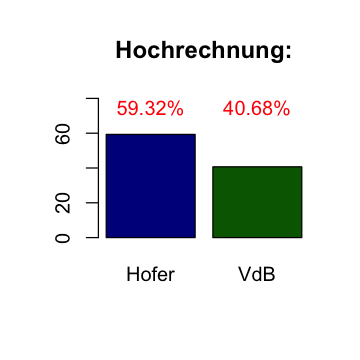

In [23]:
firstResults <- filterElectionFor(2500,includePostalVote=FALSE)
plotPoll(sum(firstResults[,7]),sum(firstResults[,9]))

(Anmerkung: Am Ende des Artikels ist der R Code zu finden mit dem ich meine Berechnungen durchführe. Alle Angaben basieren auf den offiziellen Zahlen des BMI. Leider ist es nicht möglich Wahlergebnisse mit einem Zeitpunkt ihrer Erfassung zu finden – daher bin ich darauf angewiesen die Vermutung anzustellen nur Ergebnisse von Gemeinden mit weniger als 2000 Wahlberechtigten waren verfügbar – was aber am ursprünglichen Problem kaum etwas verändert) 

## Warum das Ergebnis?

Das Ergebnis mag auf den ersten Blick überraschen – fast 60% für Norbert Hofer. Man könnte also von einem Erdrutschsieg für den FPÖ Kandidaten ausgehen? Oder? NEIN, das ist falsch und diese Daten eins zu eins als Hochrechnung für den Wahlausgang zu zeigen wäre hochgradig fahrlässig und irrefrührend. Warum?
- Dieses Ergebnis beinhaltet keine großen Städte - wie wir spätestens seit dem Wahlausgang wissen wählen aber vor allem diese Städte eher links. Sie sind dicht besiedelt und machen einen enormen Teil der Bevölkerung aus und können daher nicht einfach ignoriert werden. 
- Das Ergebnis enthaltet ebenso keine Briefwahlstimmen – BriefwählerInnen sind traditionell eher dem linken Politikspektrum zuzuordnen und die hohe Anzahl an Briefwahlstimmen bei dieser Wahl kann nicht außen vorgelassen werden. 


Die Daten einfach roh zu präsentieren und Norbert Hofer einen Erdrutschwahlsieg zu prophezeien ohne das Ergebnis der Städte zumindest zu prognostizieren ist also keinesfalls sinnvoll. 

# Eine einfache Lösung

Wir kennen bereits die Lösung des Problems – die WählerInnenstromanalyse. Ich habe diesem durchaus wichtigen Verfahren bereits einen gesonderten Artikel gewidmet den ihr hier finden könnt: 
https://github.com/bernhard2202/notebooks/blob/master/WaehlerInnenstromanalyseEinfach.ipynb

Wir haben also zu wenig Daten, die zu einseitig sind, um das Ergebnis für ganz Österreich direkt zu errechnen. Auf der anderen Seite haben wir aber genug Daten um die WählerInnenströme zu erfassen. WählerInnenstromanalysen zur kurzen Wiederholung zeigen wie viele der Personen die bei der ersten Wahl Partei A gewählt haben, bei der zweiten Wahl ihrer Partei treu geblieben sind oder eine andere Partei B gewählt haben. Wenn wir also für die 4 ausgeschiedenen Kandidaten und die Gruppe der NichtwählerInnen vorhersagen können, wie viele von ihnen bei dieser Wahl Norbert Hofer wählen werden, können wir die Stimmen die er in Summe erhalten wird sehr genau vorhersagen. Dasselbe gilt natürlich auch für die Stimmen von Alexander Van der Bellen. 

Im Folgenden habe ich eine WählerInnestromanalyse (Multiple Regression) auf den Daten der kleinen Gemeinden von oben durchgeführt und mit diesem Modell die Stimmen für Hofer und VdB prognostiziert. Für die statistisch affinen LeserInnen darf ich auf den R Code am Ende des Artikels verweisen.

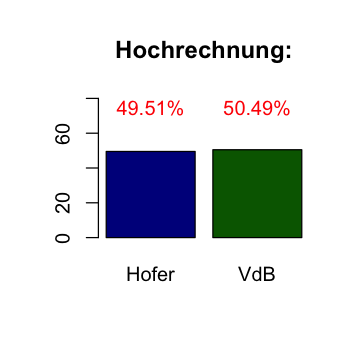

In [24]:
prediction <- predictResultsFor(2500)
plotPoll(prediction[1],prediction[2])

Mein einfaches Regressionsmodell sagt trotz des oben gezeigten Ergebnisses - in dem Norbert Hofer vermeintlich unaufhaltbar im Vorsprung ist – ein knappes 50/50 Ergebnis voraus. Konkret prophezeit es ein Endergebnis von 2.076.167 Stimmen für den FPÖ Kandidaten, und 2.117.245 Stimmen für VdB. In Summe würde meine erste Hochrechnung also nicht Norbert Hofer mit knapp 20% im Vorsprung sehen, sondern im Gegenteil Alexander Van der Bellen einen knappen Prozentpunkt Vorsprung einräumen. 
Ähnlich die Situation nach der Stichwahl – auf dem Papier war Norbert Hofer noch fast zwei Prozentpunkte im Vorsprung. Dennoch konnte SORA bereits einen sehr engen Wahlausgang prophezeien. Das ist durch genau solche Modelle möglich. 

## Wie genau ist diese Vorhersage?
Meine bescheidene Vorhersage ist im Anbetracht des wahren Wahlausgangs zumindest in Prozenten ziemlich zutreffend gewesen. In absoluten Stimmen lag sie jedoch ca. 8% daneben. Die Schwankungsbreite ist bei diesem vereinfachen Modell zu groß. Dies ist auch der Grund warum seriöse Institute wie SORA niemals ein einziges Vorhersagemodell verwenden, sondern stets mehrere Vorhersagen aus unterschiedlichen Modellen erstellen. Die im Fernsehen gezeigte Hochrechnung ist dann ein Mittel aus den verschiedenen Vorhersagen. Dadurch kann der Fehler (Schwankungsbreite) auch bei geringem Auszählungsstand bis auf wenige Prozentpunkte minimiert werden. 




# Acknowledgements
Links:
- http://www.ssoar.info/ssoar/bitstream/handle/document/5993/ssoar-oezp-2002-h_2-hofinger_et_al-orakel_der_neuzeit.pdf?sequence=1
- http://www.bmi.gv.at/cms/BMI_wahlen/bundespraes/bpw_2016/Ergebnis_2WG.aspx

Tutorial written by Bernhard Kratzwald. 
Feedback, questions, comments, wishes, complaints: bernhard2202 [at] gmail [dot] com

# R Code: 

In [30]:
# 1. Wahlgang:
election1_result <- read.csv("./electionresults/aut1.csv", header=TRUE, sep=',', dec='.')
# spalte fuer anzahl der nichtwaehler wird hinzugefuegt
election1_result$not1 <- election1_result$Wahlberechtigte - election1_result$hof - election1_result$vdb - election1_result$gri - 
          election1_result$hun - election1_result$kho - election1_result$lug
# 2. Wahlgang:
election2_result <- read.csv("./electionresults/aut.csv", header=TRUE, sep=',', dec='.')

In [26]:
# plot
plotPoll <- function(hof, vdb) {
    ges <- hof+vdb
    data <- c((hof*100/ges),(vdb*100/ges))
    midpoints <- barplot(data,
            main="Hochrechnung:",
            col=c("darkblue","darkgreen"),
            names.arg=c("Hofer", "VdB"), 
            ylim=c(0,80))
    roundData <- round(data,2)
    text(midpoints, 75, col="red", labels=paste0(roundData, "%"))
}

In [27]:
predictResultsFor <- function(maxPeople) {
    #daten filter
    primary_results <- election2_result[which(election2_result$Wahlberechtigte>0 
                                              & election2_result$Wahlberechtigte<maxPeople),]
    pred <- election1_result[which(election1_result$Wahlberechtigte>0
                                   & election1_result$Wahlberechtigte<maxPeople),]

    # vorhersage modell fuer vdb 
    fit_vdb <- lm(primary_results$vdb ~ pred$hof + pred$vdb + pred$gri 
                  + pred$hun + pred$kho + pred$lug + pred$not1 - 1)
    # und fuer hofer
    fit_hofer <- lm(primary_results$hof ~ pred$hof + pred$vdb + pred$gri 
                    + pred$hun + pred$kho + pred$lug + pred$not1 - 1)

    pred <- election1_result[1,]
    hof <- predict(fit_hofer, newdata=pred)
    vdb <- predict(fit_vdb, pred)
    hof <- data.frame(hof)[,1]
    vdb <- data.frame(vdb)[,1]

    return(c(hof,vdb))
}

In [28]:
filterElectionFor <- function(maxPeople, includePostalVote) {
    # gemeinden mit weniger als maxPeople wahlberechtigten personen ohne briefwahl
    result <- election2_result[which(election2_result$Wahlberechtigte<maxPeople),]
    if (includePostalVote == FALSE) {
            result <- result[which(result$Wahlberechtigte>0),]
    }
    return (result)
}

In [29]:
options(repr.plot.width=3, repr.plot.height=3)